# **Problem Statement**:

- company name : X Education
- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.
- To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## **Goal:**

-  Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

<img src='lead_score.jpg'/>

# **Work process**:

1. **Import the Required Libraries**
2. **Data Preprocessing:**
   - **Import the Data:** 
   - **Read and Understand the Data:** 
     - **Check the Shape of the Data:**
     - **Use `info()` to Get Information:** 
     - **Use `describe()` for Descriptive Statistics:** 
3. **Data Cleaning:**
   - **Handle Null Values:** 
   - **Data Imputation:** 
4. **Data Exploration(EDA):**
   - **Univariate Analysis:**
     - **Interpretation of Categorical Columns:**
   - **Bivariate analysis:**
     - **Categorical vs. Numeric Variables:**
   - **Multivariate analysis:**
     - **Interpretation of Numerical Columns:**
5. **Data Preparation:**
   - **Create Dummy Variables:**
   - **Split Data into Train and Test Sets:**
   - **Scale the Data:**
6. **Model Building & Feature Selection:**
     - **Apply Logistic Regression:**
   - **VIF and RFE:**
     - **Drop Variables for High VIF and P-value:**
     - **Iteratively Improve Model:**
7. **Model Evaluation:**
     - **Confusion Matrix and Accuracy:**
     - **Find Optimal CUTOFF:**
     - **Precision-Recall**:
8. **Model Evaluation on Test data Set:**
   - **Confusion Matrix and Accuracy on test data:**
   - **Precision-Recall on test data**
9. **Communicate Insights:**
   - **Executive Summary:**
   - **Model Performance Metrics**:
   - **Key Insights**:
   - **Actionable Recommendations:**
   - **Visualizations**

## **Get to know about column's**:

In [1]:
import pandas as pd
# loading the file with data information
df_1 = pd.read_excel(r'C:\Users\aksha\Desktop\M.Sc IIIT &LJU university\Class\Course.2_Machine_Learning_1\Assignment\2_lead scoring case study\AP_Lead Scoring Assignment\Leads Data Dictionary.xlsx')
df_1.head(40)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...
5,NaN,Lead Source,"The source of the lead. Includes Google, Organ..."
6,NaN,Do Not Email,An indicator variable selected by the customer...
7,NaN,Do Not Call,An indicator variable selected by the customer...
8,NaN,Converted,The target variable. Indicates whether a lead ...
9,NaN,TotalVisits,The total number of visits made by the custome...


# 1. **Import the Required Libraries:**

In [126]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

# 2. **Data Preprocessing:**

## 2.1 **Importing the data**:

In [3]:
# loading the file
df = pd.read_csv('C:/Users/aksha/Desktop/M.Sc IIIT &LJU university/Class/Course.2_Machine_Learning_1/Assignment/2_lead scoring case study/AP_Lead Scoring Assignment/Leads.csv')

In [4]:
# head of the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Dimensions of the dataset.
df.shape

(9240, 37)

## 2.2 **Data Read & Understand**:

In [6]:
#checking information of the data frame to know the dtypes and columns with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- By the above information we can see there are 30 object type variables, 7 numerical variables and out of 37.
- Also, there are quite a few categorical variables present in this dataset for which we will need to create dummy variables.
- Also, there are a lot of null values present as well, so we will need to treat them accordingly.

In [7]:
# checking the stastical information of dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


-  Based on the statistical summary of the DataFrame, it can be concluded that there are no outliers present.

>  **Since we have a good understanding of the data, we can proceed to the next step, which is data cleaning and handling null values.**

# 3. **Data Cleaning:**

In [8]:
# checking the null value
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# checking the null value in percentafe
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending= False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

- out of 37 columns 17 columns has null value present
- clearing the null value one by one column as some of the important column has high amount of null values.

## 3.1 **Hnadling Null values**:

In [10]:
# drop the column wich is not necessary
df = df.drop(['Prospect ID', 'Lead Number'],axis = 1)

- Now, clearly see that, the variables Prospect ID and Lead Number won't be of any use in the analysis, so it's best that we drop these two variables.

In [11]:
# set cutoff at 30 % for column which have null values more than cutoff 
cut_off=30
cols_to_drop=list(df.columns[100*df.isnull().mean()>cut_off])
print(cols_to_drop)
print("No. of columns to be dropped:",len(cols_to_drop))

['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
No. of columns to be dropped: 6


-  We set the cutoff at 30% because the DataFrame contains a high amount of null values. We then identify the columns with missing values greater than or equal to 30% and either drop these columns or fill the missing values as needed.

In [12]:
# drop that column which has higher missing than the cut_off
df=df.drop(cols_to_drop,axis=1)

-   There are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.(Select is 'BY Default' option)

In [13]:
# Check which columns have 'Select' values
select_columns = df.columns[df.isin(['Select']).any()]
select_columns

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [14]:
# Print all value counts of select columns
for col in select_columns:
    print(f"Value counts for column: {col}")
    print(df[col].astype('category').value_counts())
    print("\n")

Value counts for column: Specialization
Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64


Value counts for column: How did you hear about X Education
How did you hear about X Education
Select                  

-  Based on that, We are dropping `city`,`Lead Profile`,`How did you hear about X Education` column has lot of rows more that 3000 among 9000 data which have `Select` values which is no use so we drop them.
-   Also we are keeping the `Specialization` column as it has few amount of `Select` data it means majtority people did not know what to do and what to select. Also, we choose not to drop it because it might turn out to be significant in the analysis.
-   One insight we can gather is that we have a significant number of leads from Mumbai, with around 3,222 leads coming from this large city

In [15]:
df = df.drop(['City','Lead Profile','How did you hear about X Education'], axis=1)

In [16]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

## 3.2 **Data Imputation**:

In [17]:
# set cutoff at 15 % for column which have null values more than cutoff 
cut_off_1=15
missing_values = 100 * df.isnull().mean()
missing_values = missing_values[missing_values >= cut_off_1]
print(missing_values)

Country                                          26.634199
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
dtype: float64


In [18]:
# Repalcing the null value with unknown 
cols_to_fill = missing_values[missing_values > cut_off_1].index.tolist()
df[cols_to_fill] = df[cols_to_fill].fillna('unknown')

-  We set the cutoff at 15% because the minimum percentage of missing values in our data is 15%. Using this cutoff will help us achieve our goal for data imputation.
-  used `index.tolist()` which, allows us to work with the index labels as a standard list.
-  In total 8 column we have which has null value higher that 15%
-  Set the cutoff at 15%, so any column with missing values greater than 15% will be filled with 'unknown'.

In [19]:
# sumn of null values in df
df.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                         

-  Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [20]:
# for this much null value we can use dropna method for dropping that null values.
df=df.dropna()

In [21]:
# sumn of null values in df
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

>  **Since there are no null values in our dataset, we can move on to the next steps, which include exploratory data analysis (EDA).**

# 4. **Data Exploration(EDA):**

In [22]:
# category columns of dataframe
cat_cols= df.loc[:,df.dtypes == 'object']
print(len(cat_cols.columns))
print(cat_cols.columns)

22
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [23]:
# numerical columns of dataframe
num_cols= df.loc[:,df.dtypes == 'int64']
print(len(num_cols.columns))
print(num_cols.columns)

2
Index(['Converted', 'Total Time Spent on Website'], dtype='object')


## 4.1 **Univariate Analysis**:

### Interpretation of Categorical Columns:

> Since we haven't dropped many columns from our dataset and there are still a few columns left, let's check each categorical column and delete them one by one if necessary.

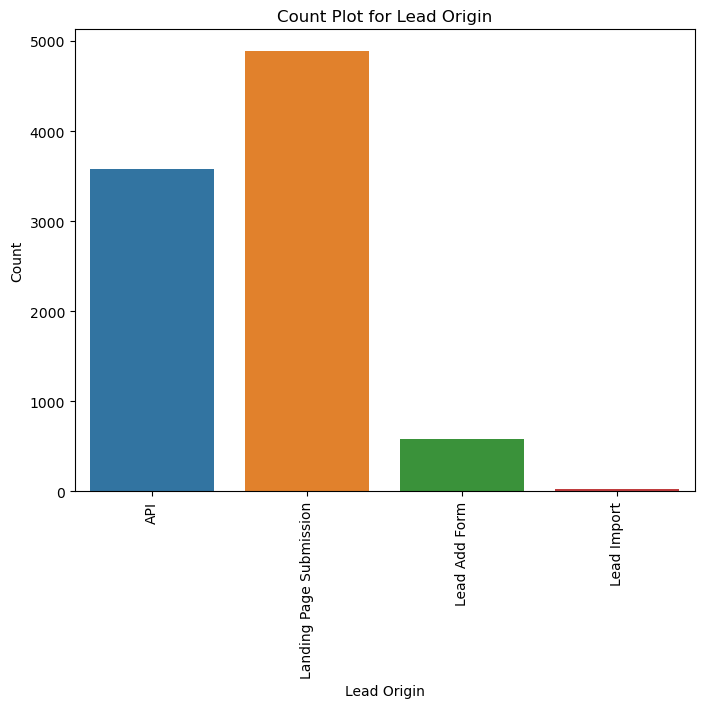

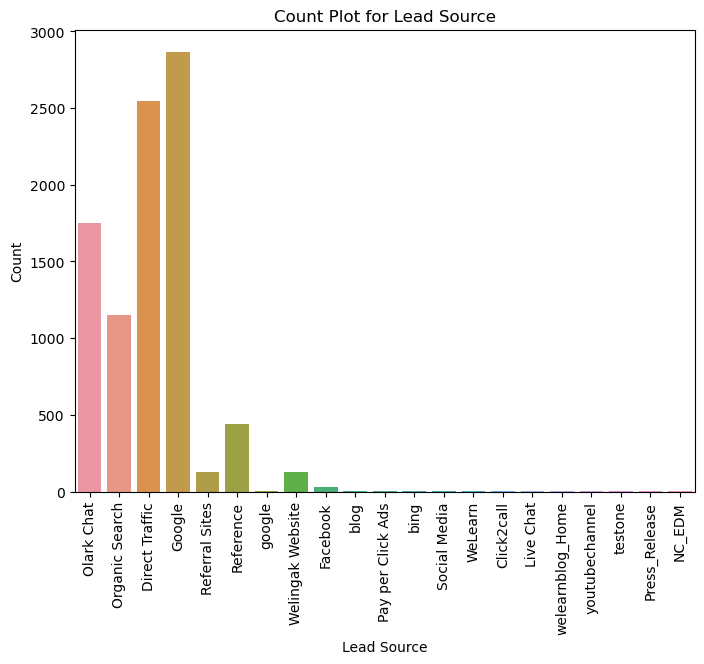

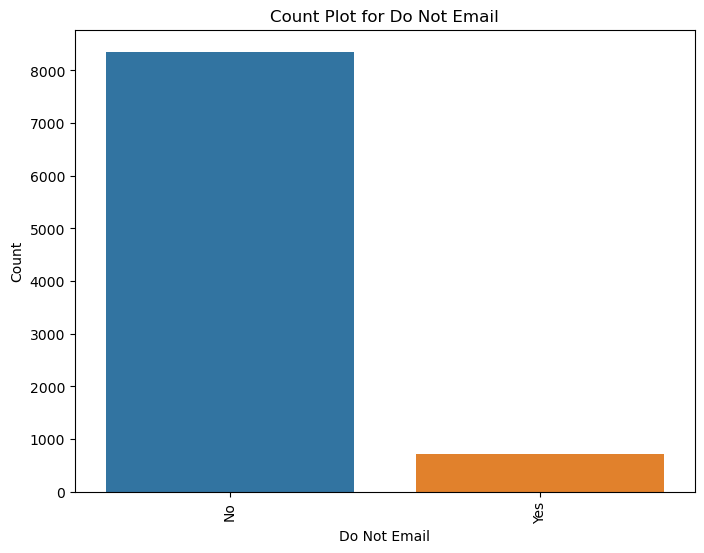

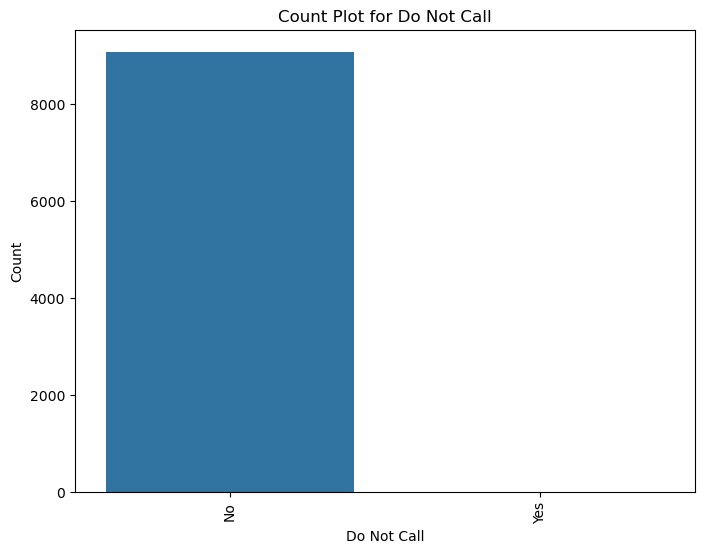

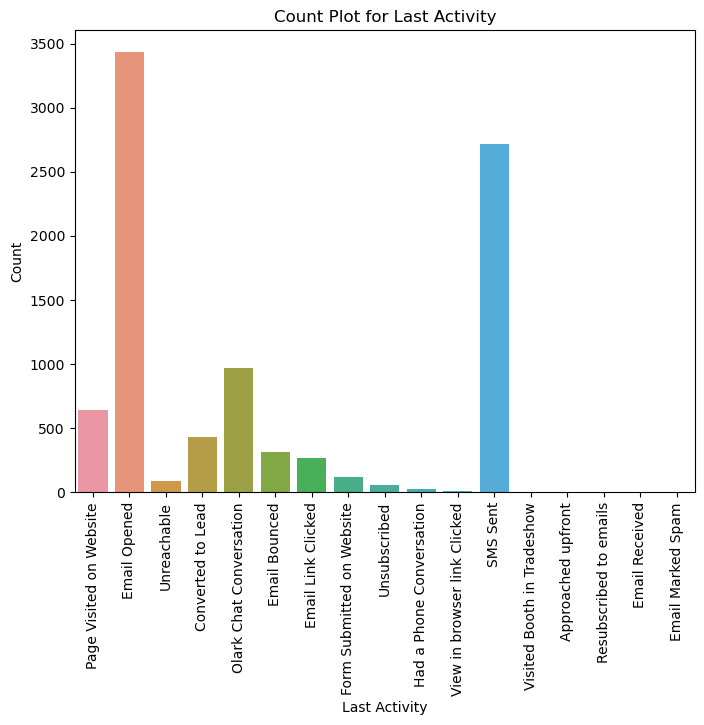

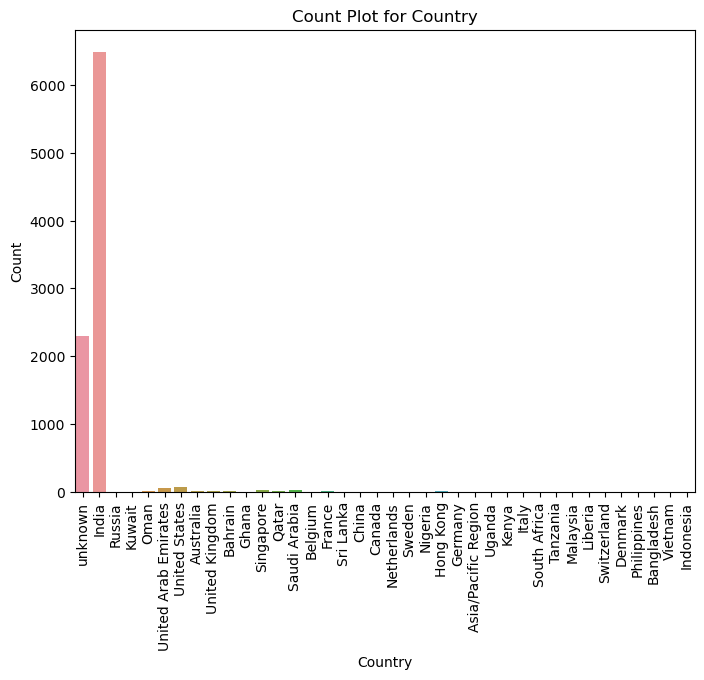

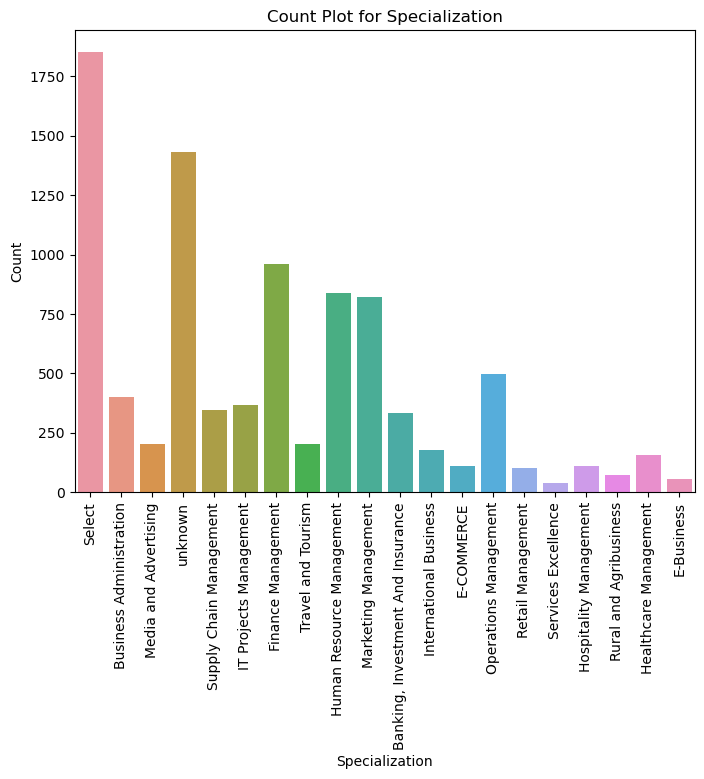

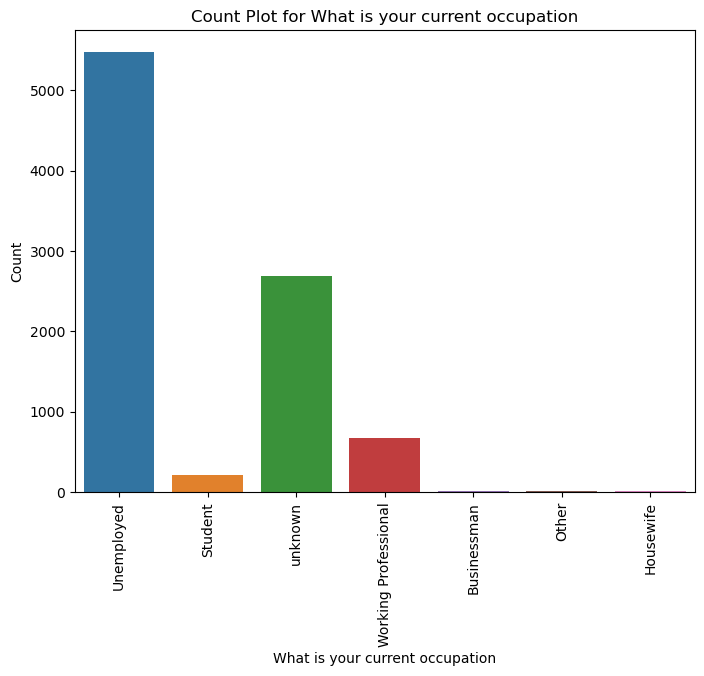

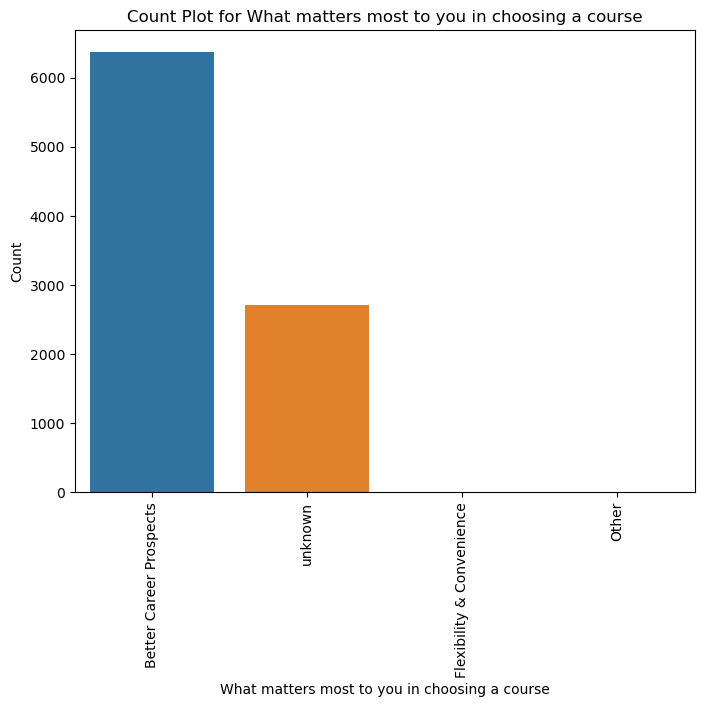

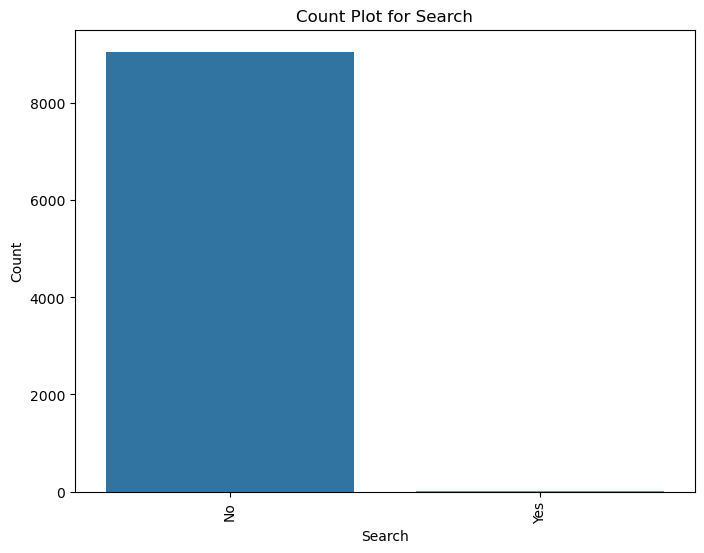

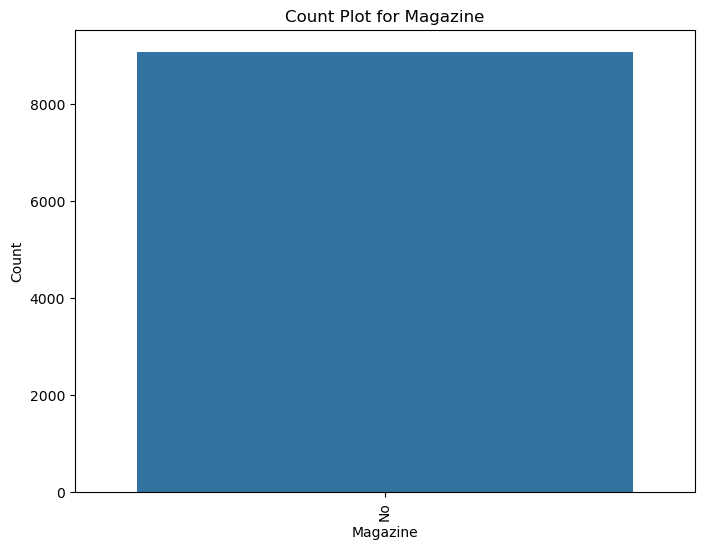

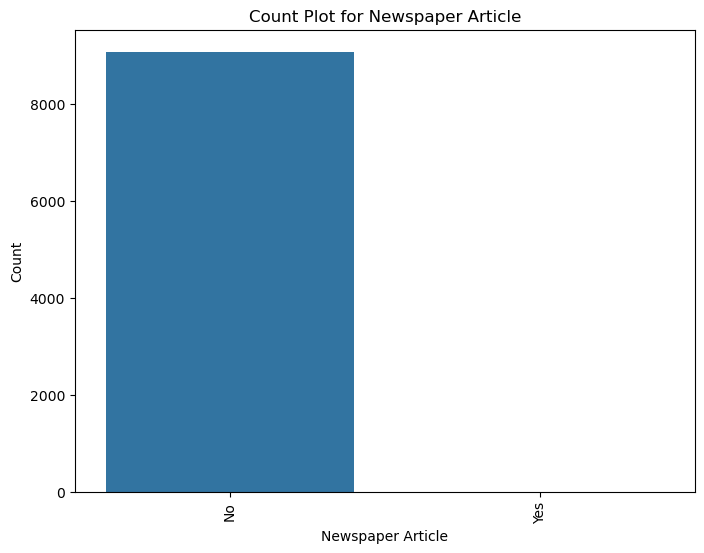

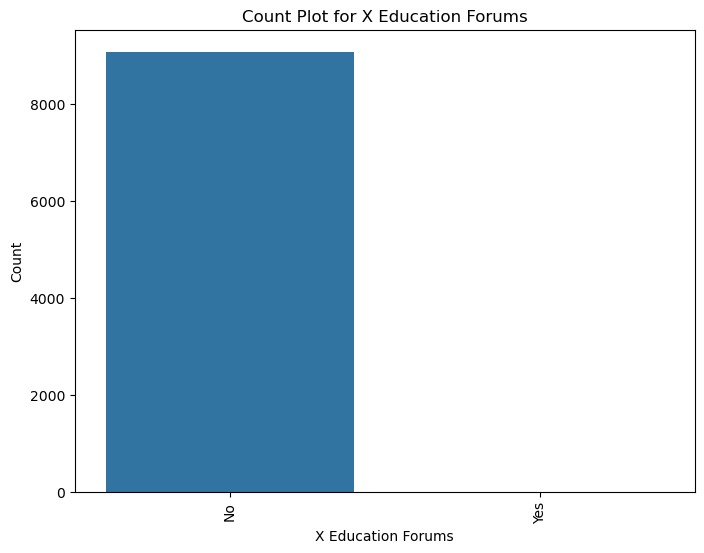

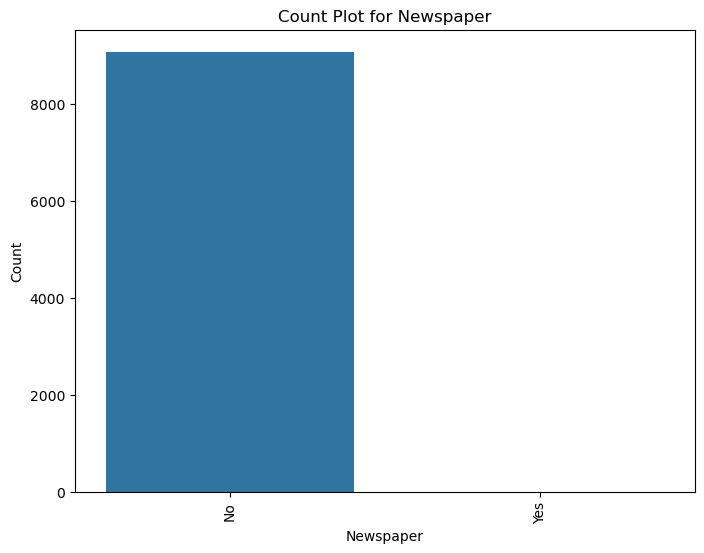

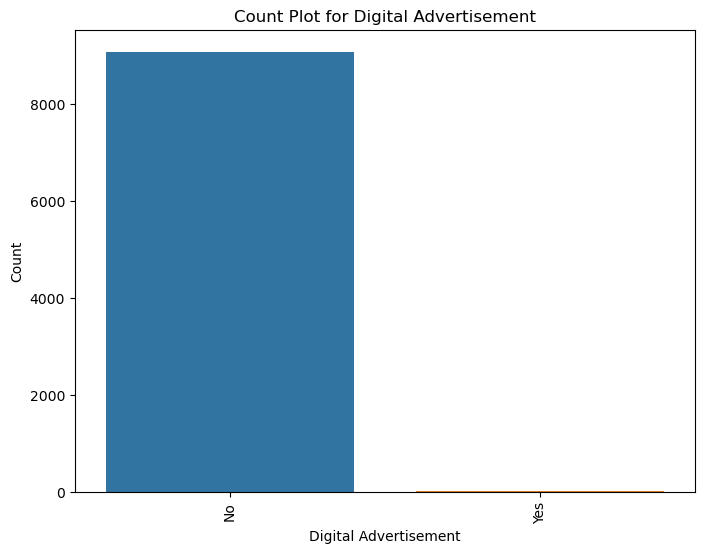

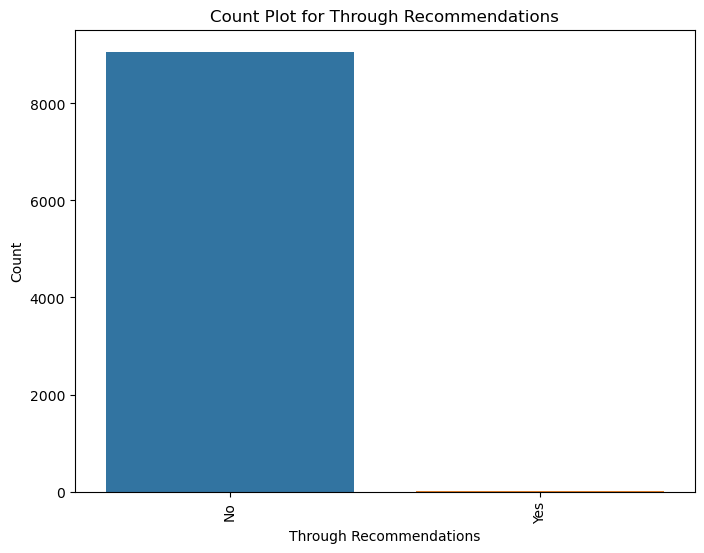

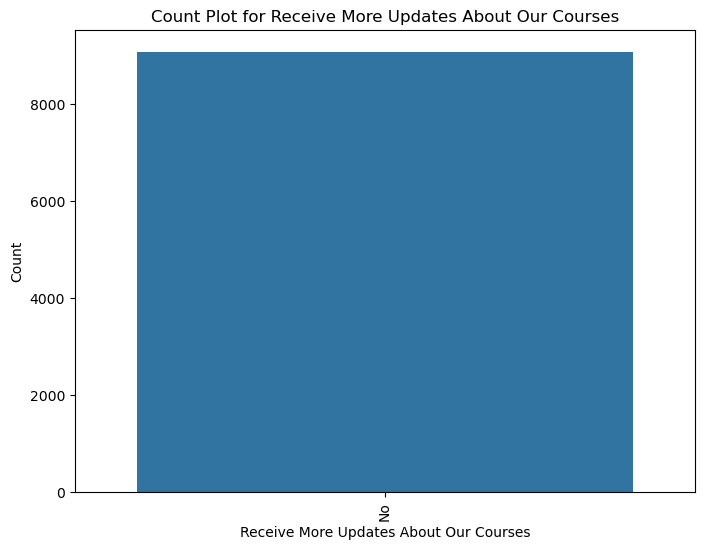

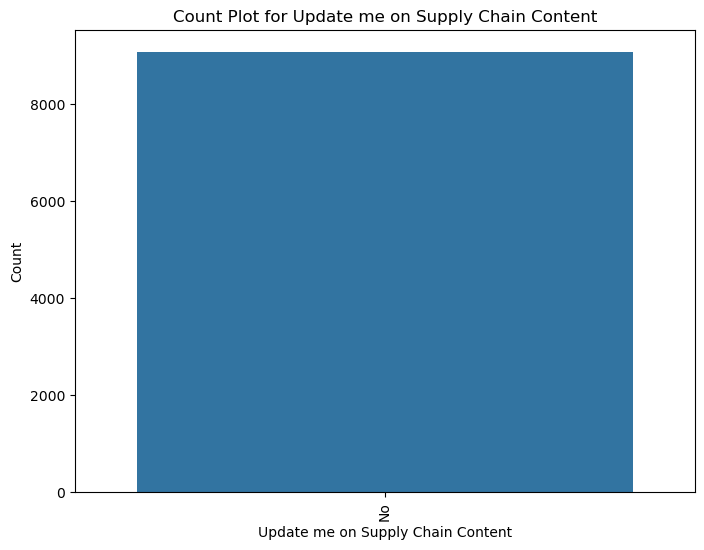

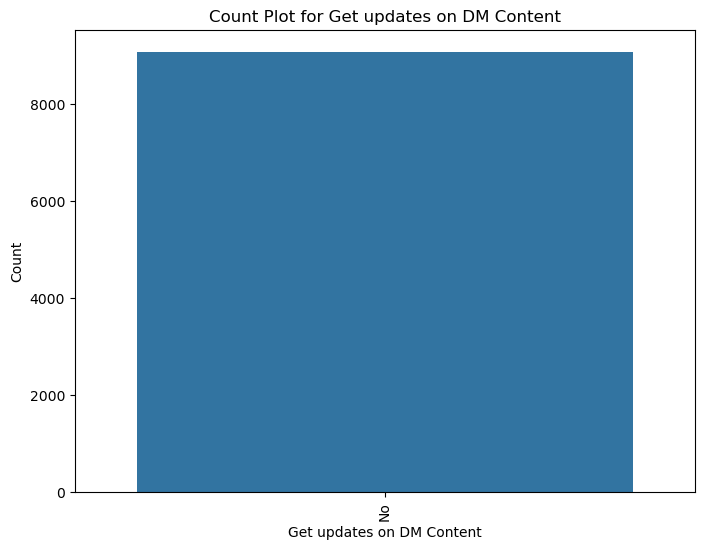

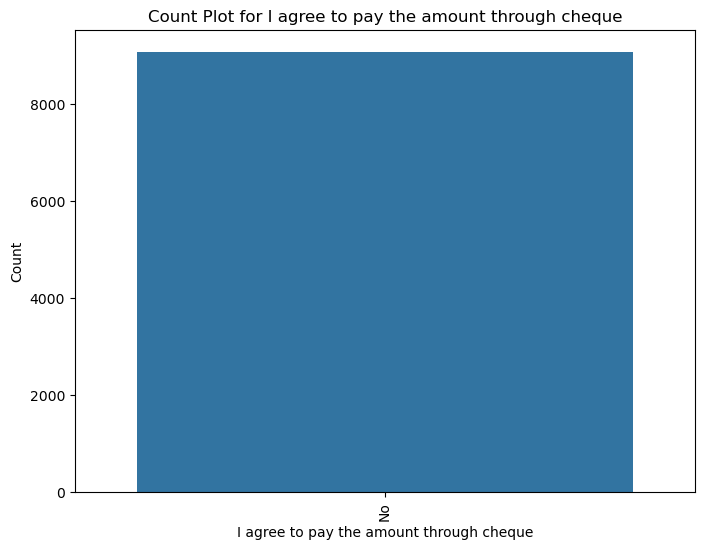

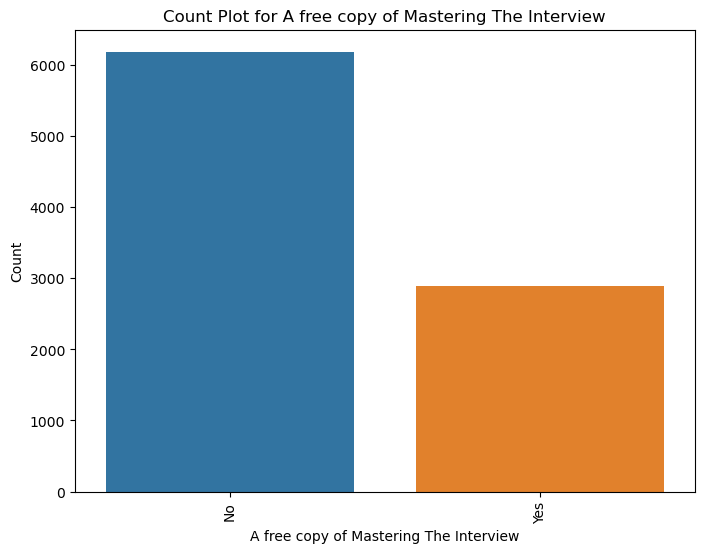

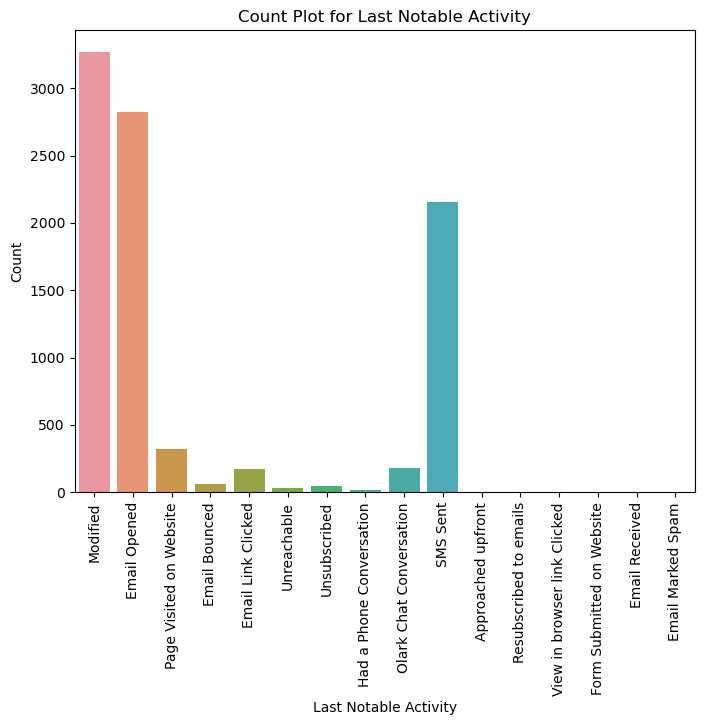

In [24]:
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

In [25]:
df= df.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
             'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
             'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis = 1)

- In the analysis of categorical columns, we observed that there are many columns where customers did not provide any answers.
- These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`.
-  In the `'Do Not Call'` column, most people are open to receiving calls, while around 2% are not interested. Similarly, in the `'Do Not Email'` column, there is a 60-40 split between 'Yes' and 'No.' We are keeping this column in the dataset for further analysis and dropping the `'Do Not Call'` columns.
- Since practically all of the values for these variables are `No`, it's best to drop these columns as they won't contribute to our further analysis.
- Additionally, it can be inferred that no one prefers to pay by cheque. 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Converted                                      9074 non-null   int64  
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   Country                                        9074 non-null   object 
 9   Specialization                                 9074 non-n

## 4.2 **Bivariate Analysis**:

### Categorical vs Numerical Variables:

In [27]:
# Identify categorical columns & Convert 'Converted' to string for hue
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df['Converted'] = df['Converted'].astype(str)

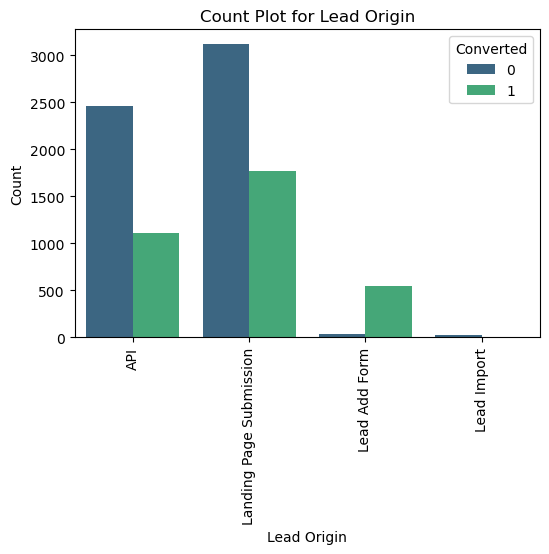

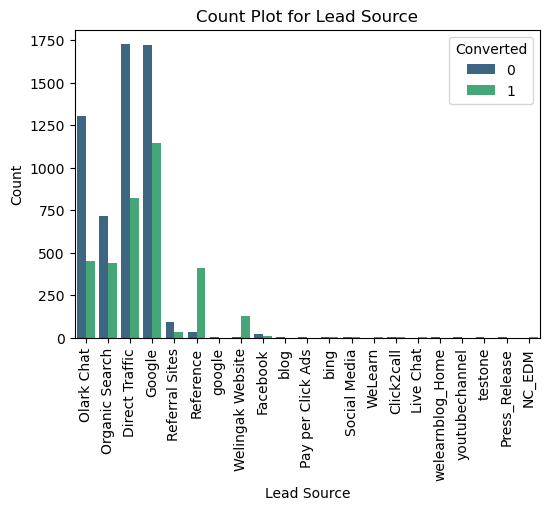

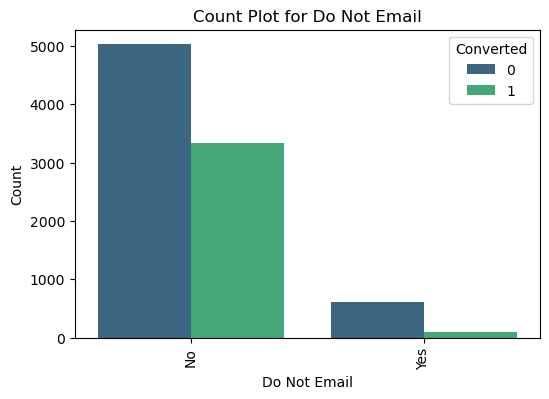

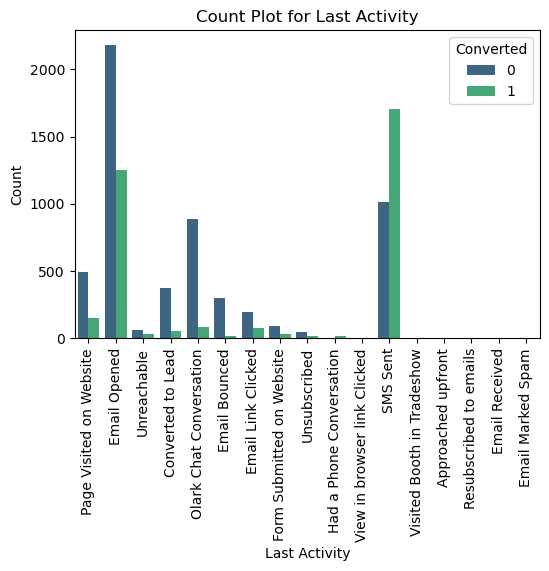

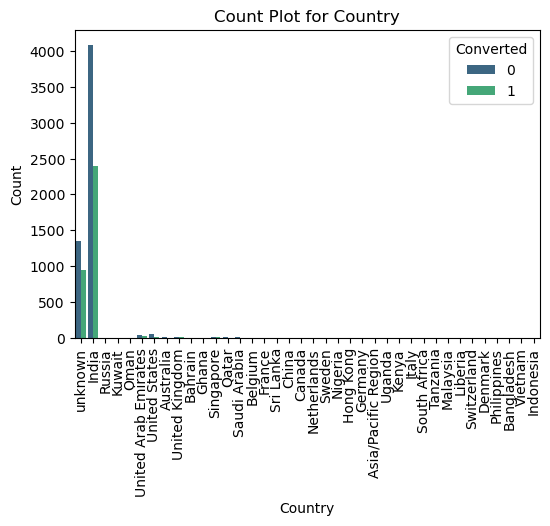

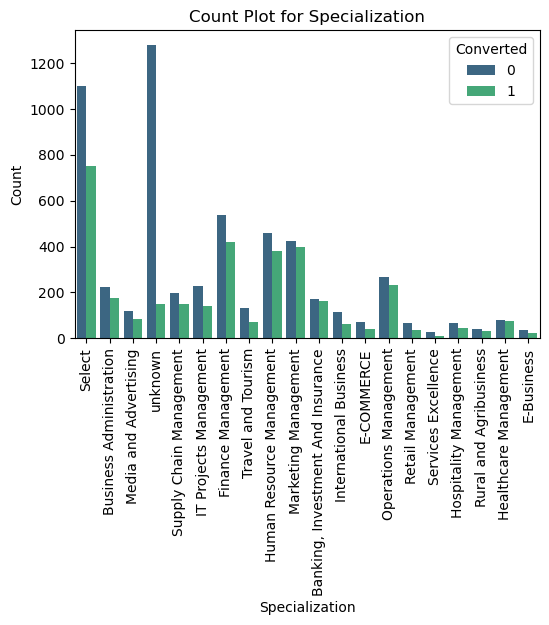

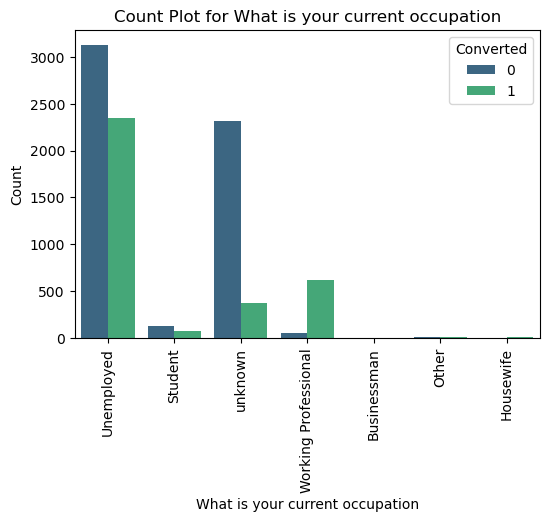

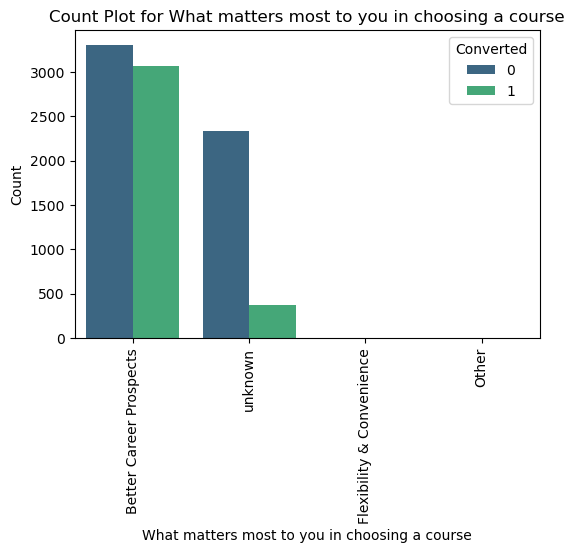

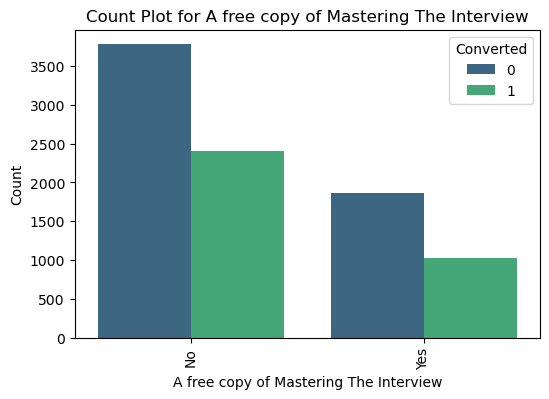

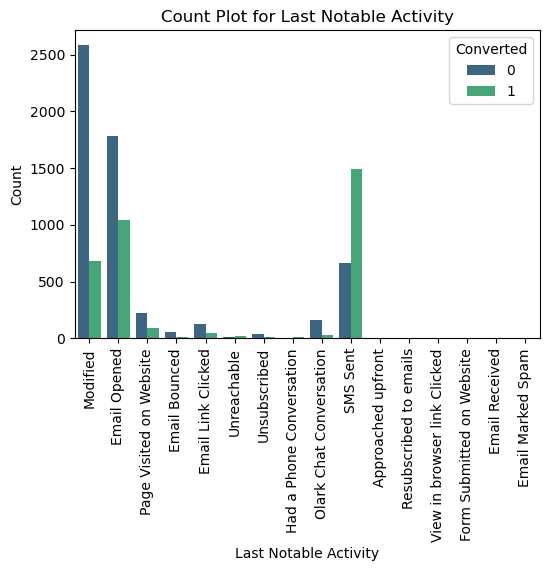

In [28]:
# Iterate through categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    # Create a count plot with hue based on 'Converted' column
    sns.countplot(x=col, hue='Converted', data=df, palette='viridis')
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

-  Interpretation of Columns:
- For the 'Lead Origin' column, the highest source of leads is from `'Landing Page Submission'`, but the conversion rate is higher for `'Lead Add Form'`.
- In the 'Lead Source' column, `'Google'` attracted the most leads, but `'Reference'` had a higher conversion rate.
- When looking at the 'Last Activity' column, `'Email Opened'` is the most common activity, yet the highest conversion rate is observed for `'SMS Sent'`.
- Regarding the 'What is your current occupation' column, the majority of approaching leads are `'Unemployed'`, but the highest conversion rate is seen among `'Working Professionals'`.
- from the 'What matters most to you in choosing a course'  we can say the majority people are itrested as they want to have a `better opportunities for career prospects`.
- For the 'Last Notable Activity' column, `'Email Opened'` is the most common activity, yet the highest conversion rate is observed for `'SMS Sent'`.

This indicates that certain attributes may have a stronger impact on the likelihood of conversion even though they might not be the most common among the leads.

- The variable `What matters most to you in choosing a course` has the level Better Career Prospects 3000 times while the other two levels appear once twice and once respectively. So we should drop this column to get better model result.
- Also,country has a high amount of data in india so we should drop this as well as we can not get any further insights from it.

In [29]:
df = df.drop(['What matters most to you in choosing a course','Country'], axis=1)

In [30]:
df['Converted'] = pd.to_numeric(df['Converted'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   object 
 

## 4.3 **Multivariate Analysis**:

### Interpretation of Numerical Columns:

In [32]:
# Identify numericall columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

In [33]:
# Compute the correlation matrix of numerical column
corr = numerical_cols.corr()
corr

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


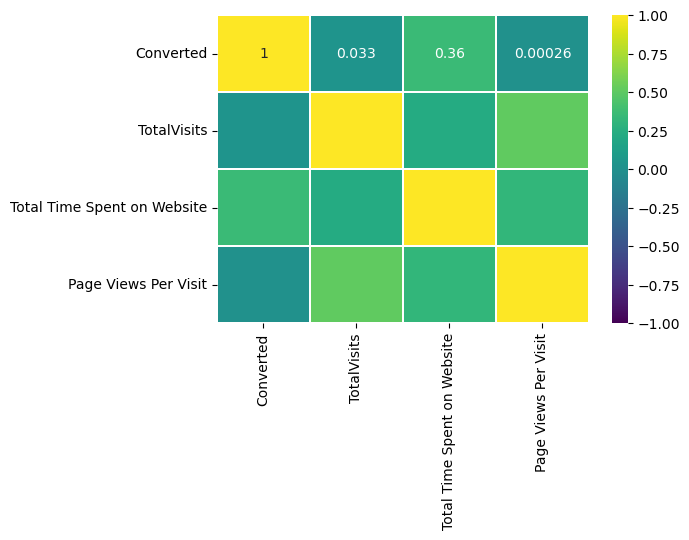

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="viridis", robust=True, linewidths=0.1, vmin=-1)
plt.show()

-   There is a strong positive correlation of 0.50 between `TotalVisits` and `Page Views Per Visit`, as well as a significant positive correlation of 0.40 between `Total Time Spent on Website` and `Converted`.

In [35]:
# remaining rows
print(len(df.index))
print(len(df.index)/9240)

9074
0.982034632034632


-  We have a substantial number of rows remaining in the dataset(arround 98%) after dropping unnecessary columns. We have not removed many rows from the dataset.

>  **As of now, we have completed data cleaning and exploratory data analysis (EDA), and identified the key features. Now, let's proceed to the next step: preparing the data for our regression model.**

# 5. **Data Preparation:**

In [36]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## 5.1 **Create Dummy Variables:**

In [37]:
# category columns of dataframe
cat_cols_1= df.loc[:,df.dtypes == 'object']
print(len(cat_cols_1.columns))
print(cat_cols_1.columns)

8
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [38]:
# create dummy variables using 'get_dummies'
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
dummy = dummy.astype(int)
df = pd.concat([df, dummy] , axis=1)

-   Since `Select` is a value in the `Specialization` column and we used 'unknown' for imputing missing data, this value is present in one of our columns and appears to be unnecessary.
-   Therefore, we explicitly dropped both the 'Select' level and the 'unknown' column.

In [39]:
# create dummy variable for remaing columns.
dummy_spl = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(columns=['Specialization_Select','Specialization_unknown'], axis=1)
dummy_spl = dummy_spl.astype(int)
df = pd.concat([df, dummy_spl] , axis = 1)

In [40]:
# Drop the variables for which the dummy variables have been created
df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity',
                   'What is your current occupation_unknown'], axis=1)

In [41]:
# Have a look at the dataset
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 5.2 **Split Data into Train and Test Sets:**

In [42]:
# our feature variables X
X=df.drop(['Converted'],axis=1)
X.shape

(9074, 82)

In [43]:
# our target variable y
Y=df['Converted']
Y.shape

(9074,)

In [44]:
# split the dataset into training an testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

## 5.3 **Scale the Data:**

-  **Ordinal Categorical Columns (where order matters, e.g., shirt size: S, M, L, XL): Use Label Encoding. This method assigns a unique integer to each category, maintaining the ordinal relationship.  Ex. label_encoder = LabelEncoder()**

-  **Nominal Categorical Columns (where order doesn't matter, e.g., shirt color: red, blue, yellow, green): Use One-Hot Encoding. This method creates binary columns for each category, allowing the model to interpret each category independently without assuming any ordinal relationship.  Ex.df = pd.get_dummies(df, columns=[])**

-  Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [45]:
# Scale the numeric features present in the dataset
scaler= MinMaxScaler()
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [46]:
# looking at the correlation table
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.032855,0.359261,0.000260,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,...,0.001674,-0.007621,0.067607,0.011600,0.044953,-0.008391,0.008560,-0.014207,0.020193,-0.008421
TotalVisits,0.032855,1.000000,0.219723,0.511068,0.290347,-0.169742,-0.037808,0.095571,-0.036983,0.106848,...,0.030332,0.034990,0.023355,0.043954,0.020840,0.037240,0.058073,0.016010,0.062917,0.064095
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350,0.292571,-0.188526,-0.050742,0.140793,-0.050248,0.215390,...,0.034764,0.023108,0.068158,0.043215,0.062165,0.028783,0.021763,0.003529,0.050945,0.043377
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000,0.484119,-0.268415,-0.056068,0.133118,-0.053735,0.204870,...,0.074513,0.069476,0.056391,0.065992,0.049289,0.045710,0.025669,0.021059,0.064994,0.113364
Lead Origin_Landing Page Submission,-0.037481,0.290347,0.292571,0.484119,1.000000,-0.282445,-0.062195,0.523695,-0.059438,0.078455,...,0.146027,0.096576,0.132351,0.100771,0.125445,0.076578,0.056174,0.048271,0.126661,0.111260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.008391,0.037240,0.028783,0.045710,0.076578,-0.018986,-0.006080,0.028146,-0.006181,0.014515,...,-0.021642,-0.014846,-0.033339,-0.015928,-0.025465,1.000000,-0.009507,-0.007024,-0.021018,-0.015928
Specialization_Rural and Agribusiness,0.008560,0.058073,0.021763,0.025669,0.056174,-0.013476,-0.005187,0.026209,-0.005273,-0.029381,...,-0.018463,-0.012666,-0.028442,-0.013589,-0.021724,-0.009507,1.000000,-0.005992,-0.017931,-0.013589
Specialization_Services Excellence,-0.014207,0.016010,0.003529,0.021059,0.048271,-0.010609,-0.003832,0.054781,-0.003896,-0.027345,...,-0.013642,-0.009358,-0.021015,-0.010040,-0.016052,-0.007024,-0.005992,1.000000,-0.013249,-0.010040
Specialization_Supply Chain Management,0.020193,0.062917,0.050945,0.064994,0.126661,-0.023868,-0.001443,0.103825,-0.001795,-0.025199,...,-0.040819,-0.028002,-0.062882,-0.030043,-0.048030,-0.021018,-0.017931,-0.013249,1.000000,-0.030043


>  **Due to the large number of variables in the dataset, it is challenging to manage all of them. Therefore, the optimal approach is to use RFE to select a smaller set of features, enabling us to proceed to the next step: model building.**

# 6. **Model Building & Feature Selection:**

## 6.1 **Apply Logistic Regression:**

In [47]:
# Create an instance of LogisticRegression
logreg = LogisticRegression()

## 6.2 **RFE & VIF:**

In [48]:
# Create an instance of Recursive Feature Elimination (RFE) & Set n_features_to_select: 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)

In [49]:
# Fit RFE on the training data
rfe = rfe.fit(X_train, Y_train)

-  As we have set our N to at 15 in RFE so it will return all the 15 usefull model and eliminate the other least 15 features.

In [50]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 55),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', False, 18),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 49),
 ('Lead Source_Press_Release', False, 64),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 42),
 ('Lead Source_WeLearn', False, 68),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 66),
 ('Lead Source_blog', False, 52),
 ('Lead Source_google', False, 47),
 ('Lead Source_testone', False, 48),
 ('Lead Source_welearnblog_Home', False, 56),
 (

In [51]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [52]:
# Select only the columns selected by RFE
x_train = X_train[col]
x_train.columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### **Model:1**

In [53]:
X_train_sm = sm.add_constant(x_train)
logm = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.4
Date:                Sat, 27 Jul 2024   Deviance:                       5394.7
Time:                        12:07:11   Pearson chi2:                 6.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2708      0.076     -3.555      0.000      -0.420      -0.122
Total Time Spent on Website                              3.9224      0.145     27.106      0.000       3.639       4.206
Lead Origin_Lead Add Form                                3.4250      0.219     15.616      0.000       2.995       3.855
Lead Source_Direct Traffic                              -0.5432      0.078     -6.998      0.000      -0.695      -0.391
Lead Source_Referral Sites                              -0.6099      0.325     -1.879      0.060      -1.246       0.026
Lead Source_Welingak Website                             2.0931      0.758      2.760      0.006       0.607       3.580
Do Not Email_Yes                                        -1.8350      0.175    -10.508      0.000      -2.177      -1.493
Last Activity_Had a Phone Conversation                   1.7191      0.781      2.200      0.028       0.188       3.251
Last Activity_Olark Chat Conversation                   -0.8061      0.187     -4.309      0.000      -1.173      -0.440
What is your current occupation_Housewife               22.5067   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_Working Professional     2.6689      0.185     14.396      0.000       2.306       3.032
Last Notable Activity_Email Link Clicked                -1.7261      0.258     -6.680      0.000      -2.233      -1.220
Last Notable Activity_Email Opened                      -1.3835      0.087    -15.893      0.000      -1.554      -1.213
Last Notable Activity_Modified                          -1.9244      0.095    -20.260      0.000      -2.111      -1.738
Last Notable Activity_Olark Chat Conversation           -1.6257      0.364     -4.462      0.000      -2.340      -0.912
Last Notable Activity_Page Visited on Website           -1.6793      0.196     -8.561      0.000      -2.064      -1.295
========================================================================================================================
"""

-  There are quite a few variable which have a p-value greater than `0.05`. like `What is your current occupation_Housewife` and we ill drop that dur to high p value.

In [54]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.74
7,Last Activity_Olark Chat Conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_Lead Add Form,1.48
2,Lead Source_Direct Traffic,1.44
4,Lead Source_Welingak Website,1.33
13,Last Notable Activity_Olark Chat Conversation,1.32
11,Last Notable Activity_Email Opened,1.30
9,What is your current occupation_Working Profes...,1.17
5,Do Not Email_Yes,1.13


In [55]:
# dropping the column which have high p.value
x_train.drop(['What is your current occupation_Housewife'], axis=1, inplace=True)

### **Model:2**

In [56]:
logm1 = sm.GLM(Y_train, (sm.add_constant(x_train)), family=sm.families.Binomial())
# Fit the GLM model to the training data
logm1_result = logm1.fit()
# Print the summary of the fitted model
logm1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.5
Date:                Sat, 27 Jul 2024   Deviance:                       5403.0
Time:                        12:07:11   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2715      0.076     -3.564      0.000      -0.421      -0.122
Total Time Spent on Website                              3.9239      0.145     27.139      0.000       3.641       4.207
Lead Origin_Lead Add Form                                3.4468      0.219     15.738      0.000       3.018       3.876
Lead Source_Direct Traffic                              -0.5429      0.078     -7.000      0.000      -0.695      -0.391
Lead Source_Referral Sites                              -0.6120      0.325     -1.886      0.059      -1.248       0.024
Lead Source_Welingak Website                             2.0700      0.758      2.729      0.006       0.584       3.556
Do Not Email_Yes                                        -1.8358      0.175    -10.509      0.000      -2.178      -1.493
Last Activity_Had a Phone Conversation                   1.7194      0.781      2.200      0.028       0.188       3.251
Last Activity_Olark Chat Conversation                   -0.8062      0.187     -4.310      0.000      -1.173      -0.440
What is your current occupation_Working Professional     2.6654      0.185     14.375      0.000       2.302       3.029
Last Notable Activity_Email Link Clicked                -1.7148      0.257     -6.676      0.000      -2.218      -1.211
Last Notable Activity_Email Opened                      -1.3768      0.087    -15.829      0.000      -1.547      -1.206
Last Notable Activity_Modified                          -1.9240      0.095    -20.255      0.000      -2.110      -1.738
Last Notable Activity_Olark Chat Conversation           -1.6255      0.364     -4.461      0.000      -2.340      -0.911
Last Notable Activity_Page Visited on Website           -1.6791      0.196     -8.560      0.000      -2.064      -1.295
========================================================================================================================
"""

-  we will drop the column `Lead Source_Referral Sites	` as it has a high p_value the `0.05`.

In [57]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.74
7,Last Activity_Olark Chat Conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_Lead Add Form,1.47
2,Lead Source_Direct Traffic,1.44
4,Lead Source_Welingak Website,1.33
12,Last Notable Activity_Olark Chat Conversation,1.32
10,Last Notable Activity_Email Opened,1.29
8,What is your current occupation_Working Profes...,1.17
5,Do Not Email_Yes,1.13


In [58]:
# dropping the column which have high p.value
x_train.drop(['Lead Source_Referral Sites'], axis=1, inplace=True)

### **Model:3**

In [59]:
logm2 = sm.GLM(Y_train, (sm.add_constant(x_train)), family=sm.families.Binomial())
# Fit the GLM model to the training data
logm2_result = logm2.fit()
# Print the summary of the fitted model
logm2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.4
Date:                Sat, 27 Jul 2024   Deviance:                       5406.9
Time:                        12:07:11   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2784      0.076     -3.659      0.000      -0.428      -0.129
Total Time Spent on Website                              3.9210      0.145     27.133      0.000       3.638       4.204
Lead Origin_Lead Add Form                                3.4574      0.219     15.789      0.000       3.028       3.887
Lead Source_Direct Traffic                              -0.5319      0.077     -6.876      0.000      -0.683      -0.380
Lead Source_Welingak Website                             2.0696      0.758      2.729      0.006       0.583       3.556
Do Not Email_Yes                                        -1.8355      0.175    -10.501      0.000      -2.178      -1.493
Last Activity_Had a Phone Conversation                   1.6872      0.786      2.147      0.032       0.147       3.228
Last Activity_Olark Chat Conversation                   -0.8147      0.187     -4.348      0.000      -1.182      -0.447
What is your current occupation_Working Professional     2.6609      0.185     14.351      0.000       2.298       3.024
Last Notable Activity_Email Link Clicked                -1.7221      0.256     -6.714      0.000      -2.225      -1.219
Last Notable Activity_Email Opened                      -1.3790      0.087    -15.862      0.000      -1.549      -1.209
Last Notable Activity_Modified                          -1.9297      0.095    -20.332      0.000      -2.116      -1.744
Last Notable Activity_Olark Chat Conversation           -1.6098      0.364     -4.417      0.000      -2.324      -0.896
Last Notable Activity_Page Visited on Website           -1.6922      0.196     -8.623      0.000      -2.077      -1.308
========================================================================================================================
"""

- This suggests that the selected features are statistically significant in the context of your model.- All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.


In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Modified,1.73
6,Last Activity_Olark Chat Conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_Lead Add Form,1.47
2,Lead Source_Direct Traffic,1.43
3,Lead Source_Welingak Website,1.33
11,Last Notable Activity_Olark Chat Conversation,1.32
9,Last Notable Activity_Email Opened,1.29
7,What is your current occupation_Working Profes...,1.17
4,Do Not Email_Yes,1.13


-  VIFs seem to be in a decent range.
-  This indicates that multicollinearity is not a significant issue among the features. 

>  **Since the Variance Inflation Factor (VIF) values for each column are around 5 or below (using 5 as the threshold), we can conclude that multicollinearity among the features is not significant. Additionally, according to RFE, the p-values for the features are also below 5. We are good to go for the next step, which is model evaluation.**

# 7. **Model Evaluation:**

In [61]:
# Use the fitted model 'res' to predict the probabilities on the training set 'X_train_sm'
y_train_pred = logm2_result.predict(sm.add_constant(x_train))
# Display the predicted probabilities for the first 10 observations
y_train_pred[:10]

3009    0.183916
1012    0.586571
9226    0.099025
4750    0.834862
7987    0.512540
1281    0.810740
2880    0.161052
4971    0.917017
7536    0.784963
1248    0.474254
dtype: float64

- The `predict()` method is used to predict the probabilities of the target variable using the fitted model `res` and the input
  features stored in the DataFrame `X_train_sm`.
  
- The predicted probabilities for the training set are stored in the variable `y_train_pred`.

- The `[:10]` indexing is used to display the predicted probabilities for the first 10 observations in the training set.

In [62]:
# Reshape the predicted probabilities 'y_train_pred' into a one-dimensional array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18391569, 0.58657132, 0.09902525, 0.83486235, 0.51254007,
       0.81073997, 0.16105248, 0.91701694, 0.78496251, 0.47425379])

- The `values` attribute is used to extract the values of the Series `y_train_pred`.

- The `reshape()` function is applied to reshape the values into a one-dimensional array. The `-1` argument is used to infer the   size of that dimension from the length of the array.

- The reshaped predicted probabilities are stored in the variable `y_train_pred`.

In [63]:
# Create a DataFrame 'y_train_pred_final' with two columns: 'Converted' and 'Pred_converted'
# 'Converted' column contains the actual target values from 'y_train'
# 'Pred_converted' column contains the predicted probabilities 'y_train_pred'
y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Pred_converted':y_train_pred})
y_train_pred_final.head()

,Converted,Pred_converted
0,0,0.183916
1,0,0.586571
2,0,0.099025
3,1,0.834862
4,1,0.512540


In [64]:
#Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Pred_converted.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Pred_converted,Predicted
0,0,0.183916,0
1,0,0.586571,1
2,0,0.099025,0
3,1,0.834862,1
4,1,0.512540,1


-  Add a new column 'Predicted' to the DataFrame 'y_train_pred_final'
-  The 'Predicted' column is created using a lambda function that maps values from 'Pred_converted' If the value is greater than cutoff which is 0.5, it maps to 1 (indicating conversion), otherwise to 0 (indicating non-conversion)

>  **Now that we have the predicted probabilities and conversion predictions, the next step is to evaluate the model using a confusion matrix..**

## 7.1 **Confusion Matrix and Accuracy:**

In [65]:
# Calculate the confusion matrix using the predicted and actual values
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3431,  474],
       [ 833, 1613]], dtype=int64)

In [66]:
# Calculate the accuracy score using the predicted and actual values
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
acc

0.7942056369075736

- The `metrics.accuracy_score()` function from the `sklearn` library is used to calculate the accuracy score.

- The accuracy score is calculated based on the 'Converted' column (actual values) and the 'Predicted' column (predicted values)   of the DataFrame 'y_train_pred_final'.

- The `acc` variable holds the resulting accuracy score.

- The code then displays the accuracy score, which represents the proportion of correct predictions out of the total predictions.

In [67]:
# Calculate True Positives, True Negatives, False Positives, and False Negatives
TP = confusion[1, 1]  # True Positives     # The model predicts a lead will convert, and they do convert.
TN = confusion[0, 0]  # True Negatives     # The model predicts a lead will not convert, and they do not convert.
FP = confusion[0, 1]  # False Positives    # The model predicts a lead will convert, but they do not convert.
FN = confusion[1, 0]  # False Negatives    # The model predicts a lead will not convert, but they do convert.
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 1613
True Negatives: 3431
False Positives: 474
False Negatives: 833


In [68]:
#finding sensitivity
TP/(TP+FN)

0.6594439901880621

In [69]:
#finding specificity
TN/(TN+FP)

0.8786171574903969

>  **At the random cutoff value of 0.5 we got:**
>  - **Accuracy = 0.794**
>  - **Sensitivity = 0.659**
>  - **Specificity = 0.878**

## 7.2 **Find Optimal CUTOFF:**

-  Optimal cutoff determines classification threshold to balance precision and recall in binary classification for best model performance. so we randomly selected cuttoff point as 0.5, this cutoff point need to be optimised in order to get the decent values for the metrics and we use ROC curve for this.So, first let's plot an ROC curve to see what AUC we get.


In [70]:
# defining function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
# calculates the Receiver Operating Characteristic (ROC) curve:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Pred_converted, drop_intermediate = False )

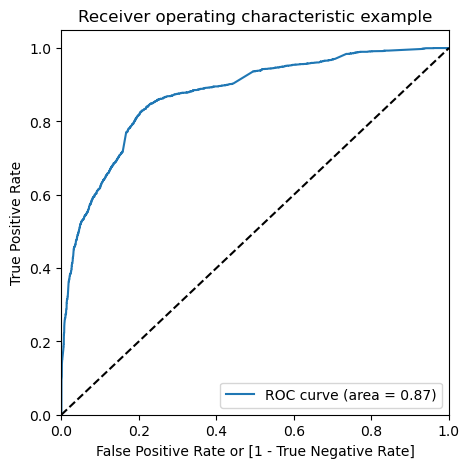

In [72]:
# Call the ROC function and passing the Converted and Pred_converted
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Pred_converted)

-  The ROC curve illustrates the trade-off between a binary classifier's true positive rate and false positive rate across varying classification thresholds, aiding performance evaluation.
-  From the ROC curve, the area under curve is 0.87 therfore our model is quite good.
-  **as we have taken cutoff value of 0.5 randomly and we need to determind the best cutoff value to get balanced secitivity and specificity.**

In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Pred_converted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Pred_converted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.183916,0,1,1,0,0,0,0,0,0,0,0
1,0,0.586571,1,1,1,1,1,1,1,0,0,0,0
2,0,0.099025,0,1,0,0,0,0,0,0,0,0,0
3,1,0.834862,1,1,1,1,1,1,1,1,1,1,0
4,1,0.512540,1,1,1,1,1,1,1,0,0,0,0


-  Create a new column for each cutoff indicating predictions based on that cutoff

In [74]:
# create a dataframe to see the values of evaluation metrics(accuracy, sensitivity, specificity) 
new_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
# Define a list of different probability cutoffs
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    # Calculate confusion matrix for the current cutoff
    met = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])  
     # Calculate total number of observations
    total1=sum(sum(met))
    # Calculate accuracy
    accuracy = (met[0,0]+met[1,1])/total1
    # Calculate specificity
    specificity = met[0,0]/(met[0,0]+met[0,1])
    # Calculate sensitivity
    sensitivity = met[1,1]/(met[1,0]+met[1,1])
    # Store the evaluation metrics in the new DataFrame
    new_df.loc[i] =[ i ,accuracy,specificity,sensitivity]
print(new_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     0.000000     1.000000
0.1   0.1  0.556290     0.297055     0.970155
0.2   0.2  0.747126     0.662228     0.882666
0.3   0.3  0.799402     0.768758     0.848324
0.4   0.4  0.807117     0.817670     0.790270
0.5   0.5  0.794206     0.878617     0.659444
0.6   0.6  0.790427     0.924200     0.576860
0.7   0.7  0.781294     0.953649     0.506132
0.8   0.8  0.756731     0.972087     0.412919
0.9   0.9  0.711541     0.989501     0.267784


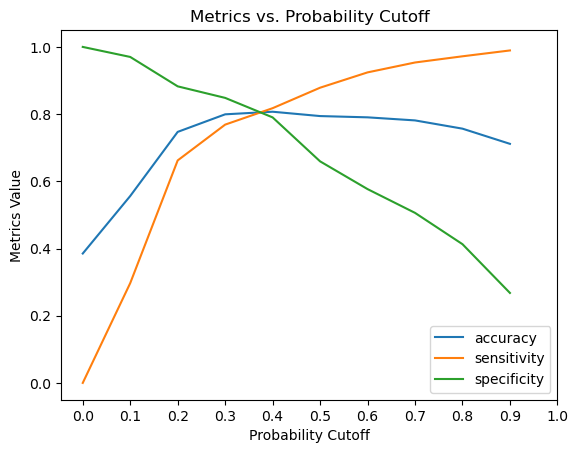

In [75]:
# Create a line plot
new_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
# Add labels and title
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics Value')
plt.title('Metrics vs. Probability Cutoff')
# Set the scaling for x axis with desired tick marks
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()


-  As you can see that around 0.39, you get the optimal values of the three metrics. So let's choose 0.39 as our cutoff now.

In [76]:
# Add a new column 'final_pred' based on a probability cutoff of 0.39
y_train_pred_final['final_pred'] = y_train_pred_final.Pred_converted.map(lambda x: 1 if x > 0.39 else 0)
# Display the first few rows of the DataFrame
y_train_pred_final.head()

,Converted,Pred_converted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
0,0,0.183916,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.586571,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.099025,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.834862,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.512540,1,1,1,1,1,1,1,0,0,0,0,1


-  This code applies the selected probability cutoff (0.39) to the predicted probabilities, classifying observations into positive or negative classes based on the logistic regression model’s predictions. 

In [77]:
# Add a new column 'Lead_Score' based on rounded predicted probabilities
y_train_pred_final['Lead_Score'] = y_train_pred_final.Pred_converted.map(lambda x: round(x * 100))
# Display the first few rows of the DataFrame
y_train_pred_final.head()

,Converted,Pred_converted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred,Lead_Score
0,0,0.183916,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.586571,1,1,1,1,1,1,1,0,0,0,0,1,59
2,0,0.099025,0,1,0,0,0,0,0,0,0,0,0,0,10
3,1,0.834862,1,1,1,1,1,1,1,1,1,1,0,1,83
4,1,0.512540,1,1,1,1,1,1,1,0,0,0,0,1,51


-  The code creates a new column, `Lead_Score`, in the y_train_pred_final DataFrame. It maps the values from the `Pred_converted` column using a lambda function that rounds each probability value to the nearest whole number and then multiplies by 100, transforming the probabilities into more interpretable lead scores.

-  This conversion helps translate predicted probabilities from the logistic regression model into lead scores that are easier to use for decision-making.

In [78]:
#calclulating accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_pred)

0.8066446228940324

In [79]:
# create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_pred )
confusion2

array([[3178,  727],
       [ 501, 1945]], dtype=int64)

In [80]:
# Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 1945
True Negatives: 3178
False Positives: 727
False Negatives: 501


In [81]:
# Calculating the 'Sensitivity'
TP/(TP+FN)

0.7951757972199509

In [82]:
# Calculating the 'Specificity'
TN/(TN+FP)

0.8138284250960307

>  **At the optimum cutoff value of 0.39 we got:**
>  - **Accuracy = 0.806**
>  - **Sensitivity = 0.795**
>  - **Specificity = 0.813**

-  We found that this cutoff is effective: previously, with a `random cutoff`, the sensitivity was 0.65, but with this `optimal cutoff`, we see a significant increase in sensitivity (which is 0.79), which aligns well with the specificity, which was 0.85 before.
-  Achieving a balance between `specificity` and `sensitivity` is also beneficial.

## 7.3 **Precision-Recall:**

In [83]:
# Calculate the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3431,  474],
       [ 833, 1613]], dtype=int64)

In [84]:
#finding Precision
TP / (TP + FP)

0.7279191616766467

In [85]:
#finding Recall
TP / (TP + FN)

0.7951757972199509

>  **For this model we got:**
>  - **Precision = 0.727**
>  - **Recall = 0.795**

In [86]:
#Comparing the actual converted values (y_train_pred_final.Converted) with the predicted values (y_train_pred_final.predicted) 
#to assess the model's performance.

y_train_pred_final['final_predicted'] = y_train_pred_final.Pred_converted.map(lambda x: 1 if x > 0.39 else 0)

# Access the 'Converted' and 'final_predicted' columns from y_train_pred_final
comparison = y_train_pred_final[['Converted', 'final_predicted']]
comparison.head()

,Converted,final_predicted
0,0,0
1,0,1
2,0,0
3,1,1
4,1,1


In [87]:
# Calculate precision, recall, and thresholds
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Pred_converted)

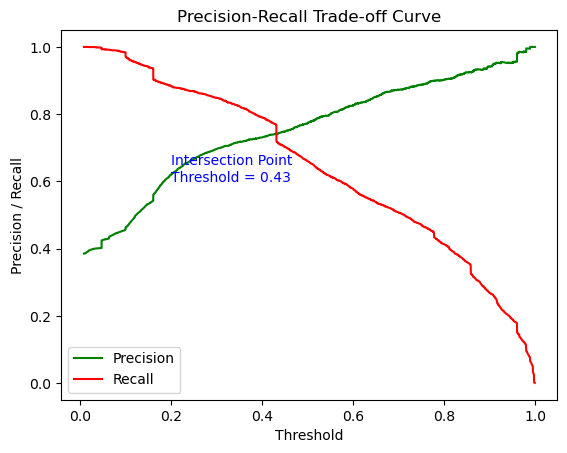

In [88]:
# Plotting the trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision-Recall Trade-off Curve")
plt.legend()

# Annotate the point where the curves intersect
intersection_point = thresholds[np.argmax(p >= r)]
plt.annotate(f'Intersection Point\nThreshold = {intersection_point:.2f}', 
             xy=(intersection_point, max(p[:-1])), 
             xytext=(0.2, 0.6),  # Adjust xytext to position the annotation higher
             fontsize=10,       # Adjust font size for better visibility
             color='blue')      # Adjust text color
plt.show()

- The graph above illustrates the trade-off between Precision and Recall.
>   **Having trained our model with the training data, we can now proceed to the next step: testing the model on unseen data.**

# 8.**Model Evaluation on Test Set:**

In [89]:
# Use MinMaxScaler to scale specific columns in x_test
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [90]:
# Selecting the same 15 columns from x_train in x_test
x_test = X_test[col]
x_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0.070530,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0.679695,0,1,0,0,0,0,0,0,1,0,1,0,0,0
7936,0.033243,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0.073675,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [91]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(x_test[col])

In [92]:
# Dropping columns from X_test_sm
X_test_sm.drop(['Lead Source_Referral Sites', 'What is your current occupation_Housewife'], axis=1, inplace=True)

In [93]:
# check the shape of the test data
X_test_sm.shape

(2723, 14)

In [94]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(x_test))

In [95]:
# Predicting probabilities on the test set using the trained model
y_test_pred[:10]

3271    0.201374
1490    0.958405
7936    0.178876
4216    0.773768
3830    0.203365
1800    0.759217
6507    0.489118
4821    0.269758
4223    0.959071
4714    0.100177
dtype: float64

In [96]:
# Convert the predicted probabilities into a pandas DataFrame
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
3271,0.201374
1490,0.958405
7936,0.178876
4216,0.773768
3830,0.203365


In [97]:
# Convert y_test to a pandas DataFrame
y_test = pd.DataFrame(Y_test)

In [98]:
# Add a new column 'Prospect ID' to y_test DataFrame using the index values
y_test['Prospect ID'] = y_test.index
y_test.head()

,Converted,Prospect ID
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830


In [99]:
# Reset the index of y_test_pred DataFrame and drop the old index column
y_test_pred.reset_index(drop=True, inplace=True)
# Reset the index of y_test DataFrame and drop the old index column
y_test.reset_index(drop=True, inplace=True)

In [100]:
# Concatenate y_test and y_test_pred DataFrames horizontally
y_test_pred_final = pd.concat([y_test, y_test_pred], axis=1)
# Renaming the column '0' to 'Pred_converted' in the y_test_pred_final DataFrame
y_test_pred_final = y_test_pred_final.rename(columns={0: 'Pred_converted'})
y_test_pred_final.head()

,Converted,Prospect ID,Pred_converted
0,0,3271,0.201374
1,1,1490,0.958405
2,0,7936,0.178876
3,1,4216,0.773768
4,0,3830,0.203365


## 8.1 **Confusion Matrix and Accuracy on test data:**

In [101]:
# Reordering columns in y_test_pred_final DataFrame
y_test_pred_final = y_test_pred_final.reindex(columns=['Prospect ID', 'Converted', 'Pred_converted'])
# Applying a custom threshold to predict final conversion
y_test_pred_final['final_predicted'] = y_test_pred_final.Pred_converted.map(lambda x: 1 if x > 0.39 else 0)
y_test_pred_final.head()

,Prospect ID,Converted,Pred_converted,final_predicted
0,3271,0,0.201374,0
1,1490,1,0.958405,1
2,7936,0,0.178876,0
3,4216,1,0.773768,1
4,3830,0,0.203365,0


In [102]:
# Calculate the accuracy score for the final predictions on the test dataset
accuracy = metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.final_predicted)
accuracy

0.8024237972824091

In [103]:
confusion2 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.final_predicted )
confusion2

array([[1413,  321],
       [ 217,  772]], dtype=int64)

In [104]:
# Calculate TP, TN, FP, and FN from the confusion matrix
TP = confusion2[1, 1]  # True Positives: correctly predicted positive instances
TN = confusion2[0, 0]  # True Negatives: correctly predicted negative instances
FP = confusion2[0, 1]  # False Positives: negative instances predicted as positive
FN = confusion2[1, 0]  # False Negatives: positive instances predicted as negative
# Print the values of TP, TN, FP, and FN
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 772
True Negatives: 1413
False Positives: 321
False Negatives: 217


In [105]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7805864509605662

In [106]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.8148788927335641

In [107]:
# Create a new column 'Lead_Score' in the DataFrame by mapping the predicted probabilities to rounded scores
y_test_pred_final['Lead_Score'] = y_test_pred_final.Pred_converted.map(lambda x: round(x * 100))
y_test_pred_final.head()

,Prospect ID,Converted,Pred_converted,final_predicted,Lead_Score
0,3271,0,0.201374,0,20
1,1490,1,0.958405,1,96
2,7936,0,0.178876,0,18
3,4216,1,0.773768,1,77
4,3830,0,0.203365,0,20


- To have a better understanding i added round of `Lead_Score` column. 

>  **For Test set we got the metrics as**:
>  - **Accuracy = 0.802**
>  - **Sensitivity = 0.780**
>  - **Specificity = 0.814**

## 8.2 **Precision-Recall on test data:**

In [108]:
# Calculate the confusion matrix for the test set predictions
confusion = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])
print(confusion)

[[1413  321]
 [ 217  772]]


In [109]:
#finding Precision
TP / (TP + FP)

0.7063129002744739

In [110]:
#finding Recall
TP / (TP + FN)

0.7805864509605662

>  **For this model we got:**
>  - **Precision = 0.706**
>  - **Recall = 0.780**

In [111]:
#Comparing the actual converted values (y_train_pred_final.Converted) with the predicted values (y_train_pred_final.predicted) 
#to assess the model's performance.
y_test_pred_final['final_predicted'] = y_test_pred_final.Pred_converted.map(lambda x: 1 if x > 0.39 else 0)
# Access the 'Converted' and 'final_predicted' columns from y_train_pred_final
comparison = y_test_pred_final[['Converted', 'final_predicted']]
comparison.head()

,Converted,final_predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


In [112]:
# Calculate precision, recall, and thresholds
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Pred_converted)

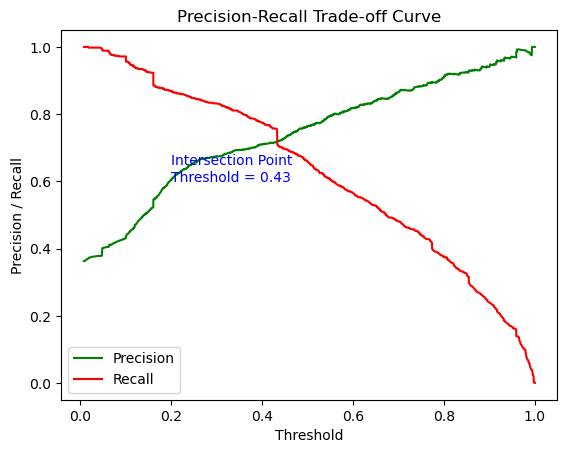

In [113]:
# Plotting the trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision-Recall Trade-off Curve")
plt.legend()
# Annotate the point where the curves intersect
intersection_point = thresholds[np.argmax(p >= r)]
plt.annotate(f'Intersection Point\nThreshold = {intersection_point:.2f}', 
             xy=(intersection_point, max(p[:-1])), 
             xytext=(0.2, 0.6),  # Adjust xytext to position the annotation higher
             fontsize=10,       # Adjust font size for better visibility
             color='blue')      # Adjust text color
plt.show()

-  The graph presented above illustrates the trade-off relationship between Precision and Recall.

# 9.**Communicate Insights:**

## 9.1 **Executive Summary:**

-  **The metrics for the training and test sets are very similar, indicating that the model generalizes well and is not overfitting. The small differences in precision and recall suggest that the model's performance is stable across different datasets. This consistency implies that the model is reliable and can be trusted for making predictions on new, unseen data.**
-  **`TotalVisits`, `Total Time spent on the website`, `Lead Origin_Lead Add Form` are the top three variables in model which contribute most towards the probability of a lead getting converted**
-  **`Lead Origin_Lead Add Form`, `Last Activity_Had a phone conversation`, `Lead Score_Wellingak Website` are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion**

## 9.2 **Model Performance Metrics:**

-  Comparing metrics for both Train and Test sets.

>  **For Train set we got the metrics as:**
>  - **Accuracy = 0.806**
>  - **Sensitivity = 0.795**
>  - **Specificity = 0.813**
>  - **Precision = 0.727**
>  - **Recall = 0.795**

>  **For Test set we got the metrics as**:
>  - **Accuracy = 0.802**
>  - **Sensitivity = 0.780**
>  - **Specificity = 0.814**
>  - **Precision = 0.706**
>  - **Recall = 0.780**

-  **After comparing the evaluation metrics of the test and train datasets, we observe that they exhibit similar values. This suggests that our model is performing well and consistently across different data subsets and 80.6% training accuracy and 80.2% test accuracy indicate a good balance, with no significant overfitting or underfitting observed.**
-  **Accuracy: The accuracy on the training and test sets are very close, indicating that the model performs consistently across both datasets. This suggests that the model is not overfitting and has good generalization.**
-  **Sensitivity: Sensitivity, is slightly higher on the training set compared to the test set but is still close. This means that the model is similarly effective at identifying positive cases in both sets, implying reliable performance in detecting true positives.**
-  **Specificity: Specificity is almost identical for both training and test sets. This indicates that the model is equally good at correctly identifying negative cases in both datasets.**
-  **Precision: Precision is slightly higher on the training set compared to the test set. This suggests that the model is somewhat more effective at reducing false positives in the training data, but the performance drop in the test set is minimal, indicating consistent performance.**
-  **Recall: The recall values are close between the training and test sets, further indicating the model's consistency in identifying positive cases.**

## 9.3 **Key Insights:**

#### Assumptions:

-  **Both the training and test set accuracies are around 80% (0.806 and 0.802, respectively).**
-  **This suggests that the model correctly predicts lead conversion outcomes approximately 80% of the time.**

#### "Lead Score" Threshold for 'Hot Leads':

-  **If the model assigns a "Lead Score" of 85 or higher, it indicates a high probability of conversion.**
-  **Given the model's precision and recall, targeting leads with a score of 85 or higher is a reasonable strategy to classify 'Hot Leads'.**
-  **Given the model’s accuracy of around 80%, it is fair to state that the achieved target lead conversion rate is approximately 80%. Using a "Lead Score" threshold of 85 or higher to identify 'Hot Leads' is a practical approach to improve conversion rates by targeting the most promising leads.**

#### Implementation:

-  **Define 'Hot Leads': Customers with a "Lead Score" of 85 or higher can be considered 'Hot Leads'.**
-  **Contact Strategy: Focus on contacting these high-scoring leads as they have a higher likelihood of conversion based on the model's predictions.**

In [114]:
# Filter out the hot leads from the test predictions dataframe
hot_leads = y_test_pred_final.loc[y_test_pred_final["Lead_Score"] >= 85]
hot_leads.head()

,Prospect ID,Converted,Pred_converted,final_predicted,Lead_Score
1,1490,1,0.958405,1,96
8,4223,1,0.959071,1,96
21,2461,1,0.994766,1,99
23,5822,1,0.997050,1,100
25,2684,1,0.997050,1,100


>  **A total of 388 leads are potential candidates for contact, with a significant probability of conversion.**

In [115]:
#listing out the prospect ids of the customers.
target_list= hot_leads['Prospect ID'].values

## 9.4 **Actionable Recommendations:**

1. **Target High-Conversion Sources:** Focus on leads originating from `Reference` and `Welingak Website`  and `Organic search` sources, as they have a higher likelihood of conversion. 

2. **Prioritize Working Professionals:** Prioritize leads who are `working professionals`, as they show a higher tendency to convert into customers.

3. **Engage High-Engagement Visitors:** Reach out to leads who `spent more time on the website` or `page visited` as their engagement suggests a higher chance of conversion.

4. **Tap into Chat Leads:** Give special attention to leads from the `Olark Chat` source, as they exhibit a higher probability of conversion.

5. **Leverage SMS-Sent Activity:** Reach out to leads whose last activity was marked as `SMS Sent` as this activity indicates a better chance of conversion.

6. **Avoid Olark Chat Conversations:** Consider not contacting leads whose last activity was `Olark Chat Conversation` as these interactions are less likely to result in conversion.

7. **Assess Lead Origin:** Be cautious with leads from `Landing Page Submission` as they tend to have lower conversion rates.

8. **Specialization Matters:** Focus on leads with specializations like `Working professionals` and `Unemployed`, as they are more likely to seek better career opportunities and show a higher likelihood of conversion. Be selective with leads labelled as `Others`, `Businessman` or `Housewife` as these categories demonstrate a lower likelihood of conversion.

9. **Avoid "Do Not Email" Leads:** Minimize outreach to leads who have opted for `Do Not Email` since they are less likely to convert.
    
10. **Optimize Lead Form Strategy:** Improve the design and content of your `lead capture forms` called `Lead form` to enhance data quality and lead scoring accuracy.

>  **These recommendations are based on the analysis of the model and can assist in optimizing lead engagement strategies for higher conversion rates.**

## 9.5 **Not part of this project but, Visualizations for better insights using RF:**

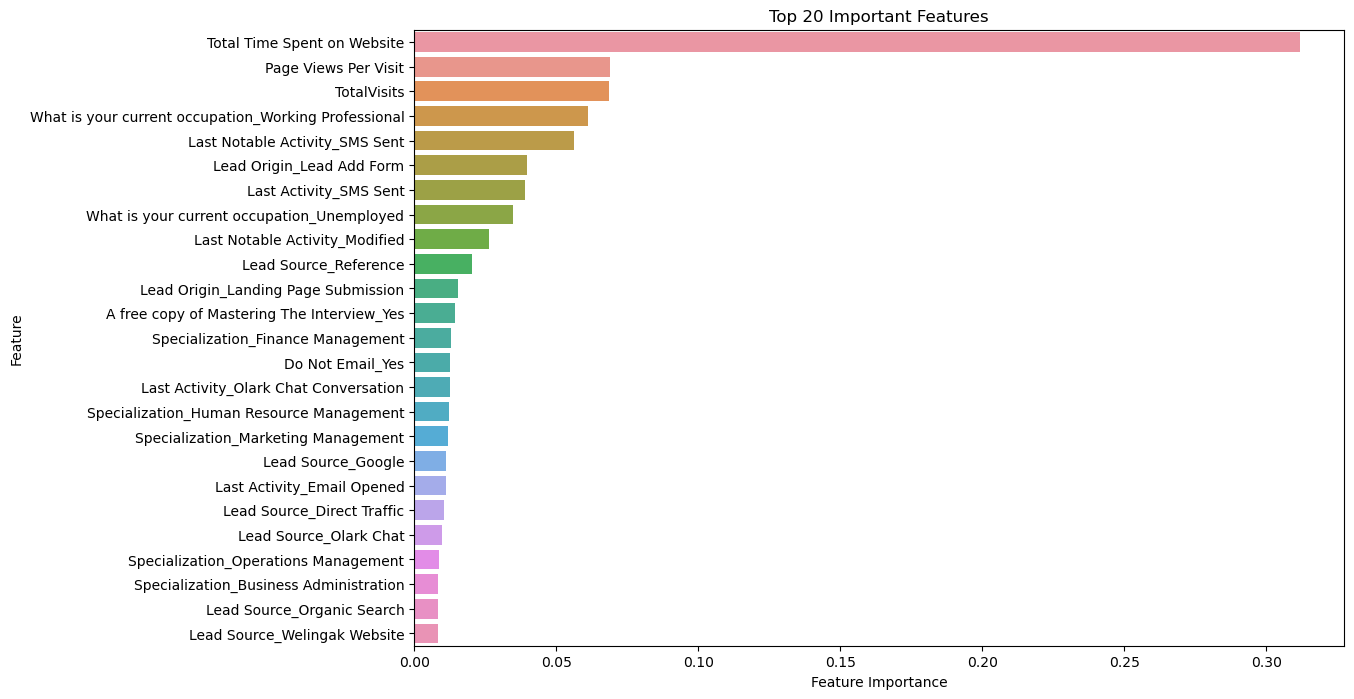

In [136]:
# Train the Random Forest model for better understanding
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
# Get feature importances
importances = model.feature_importances_
# Create a DataFrame for feature importances
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
# Sort features by importance and select the top 25
top_features = features_df.sort_values(by='Importance', ascending=False).head(25)

# Plot the top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 20 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### **Author:**

#### **AXAR PATEL**